# Sri Lanka Weather Dataset Analysis

## Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the dataset
dataset_path = "../DataPreprocessing/Dataset/SriLanka_Weather_Dataset new.csv"

# Load the dataset into a Pandas DataFrame with 'time' column as index
weather_df = pd.read_csv(dataset_path, parse_dates=['time'], index_col='time')

print("Dataset Information:")
print(weather_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147480 entries, 2010-01-01 to 2023-06-17
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   weathercode                 147480 non-null  int64  
 1   temperature_2m_max          147480 non-null  float64
 2   temperature_2m_min          147480 non-null  float64
 3   temperature_2m_mean         147480 non-null  float64
 4   apparent_temperature_max    147480 non-null  float64
 5   apparent_temperature_min    147480 non-null  float64
 6   apparent_temperature_mean   147480 non-null  float64
 7   sunrise                     147480 non-null  object 
 8   sunset                      147480 non-null  object 
 9   shortwave_radiation_sum     147480 non-null  float64
 10  precipitation_sum           147480 non-null  float64
 11  rain_sum                    147480 non-null  float64
 12  snowfall_sum                147480 

In [2]:
# Display the header names
header_names = weather_df.columns.tolist()
print("Header Names:", header_names)

Header Names: ['weathercode', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise', 'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation', 'country', 'city']


In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(weather_df.info())

# Check for missing values
print("\nMissing Values:")
print(weather_df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147480 entries, 2010-01-01 to 2023-06-17
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   weathercode                 147480 non-null  int64  
 1   temperature_2m_max          147480 non-null  float64
 2   temperature_2m_min          147480 non-null  float64
 3   temperature_2m_mean         147480 non-null  float64
 4   apparent_temperature_max    147480 non-null  float64
 5   apparent_temperature_min    147480 non-null  float64
 6   apparent_temperature_mean   147480 non-null  float64
 7   sunrise                     147480 non-null  object 
 8   sunset                      147480 non-null  object 
 9   shortwave_radiation_sum     147480 non-null  float64
 10  precipitation_sum           147480 non-null  float64
 11  rain_sum                    147480 non-null  float64
 12  snowfall_sum                147480 

In [4]:
weather_df.city.unique()

array(['Colombo', 'Mount Lavinia', 'Kesbewa', 'Moratuwa', 'Maharagama',
       'Ratnapura', 'Kandy', 'Negombo', 'Sri Jayewardenepura Kotte',
       'Kalmunai', 'Trincomalee', 'Galle', 'Jaffna', 'Athurugiriya',
       'Weligama', 'Matara', 'Kolonnawa', 'Gampaha', 'Puttalam',
       'Badulla', 'Kalutara', 'Bentota', 'Matale', 'Mannar', 'Pothuhera',
       'Kurunegala', 'Mabole', 'Hatton', 'Hambantota', 'Oruwala'],
      dtype=object)

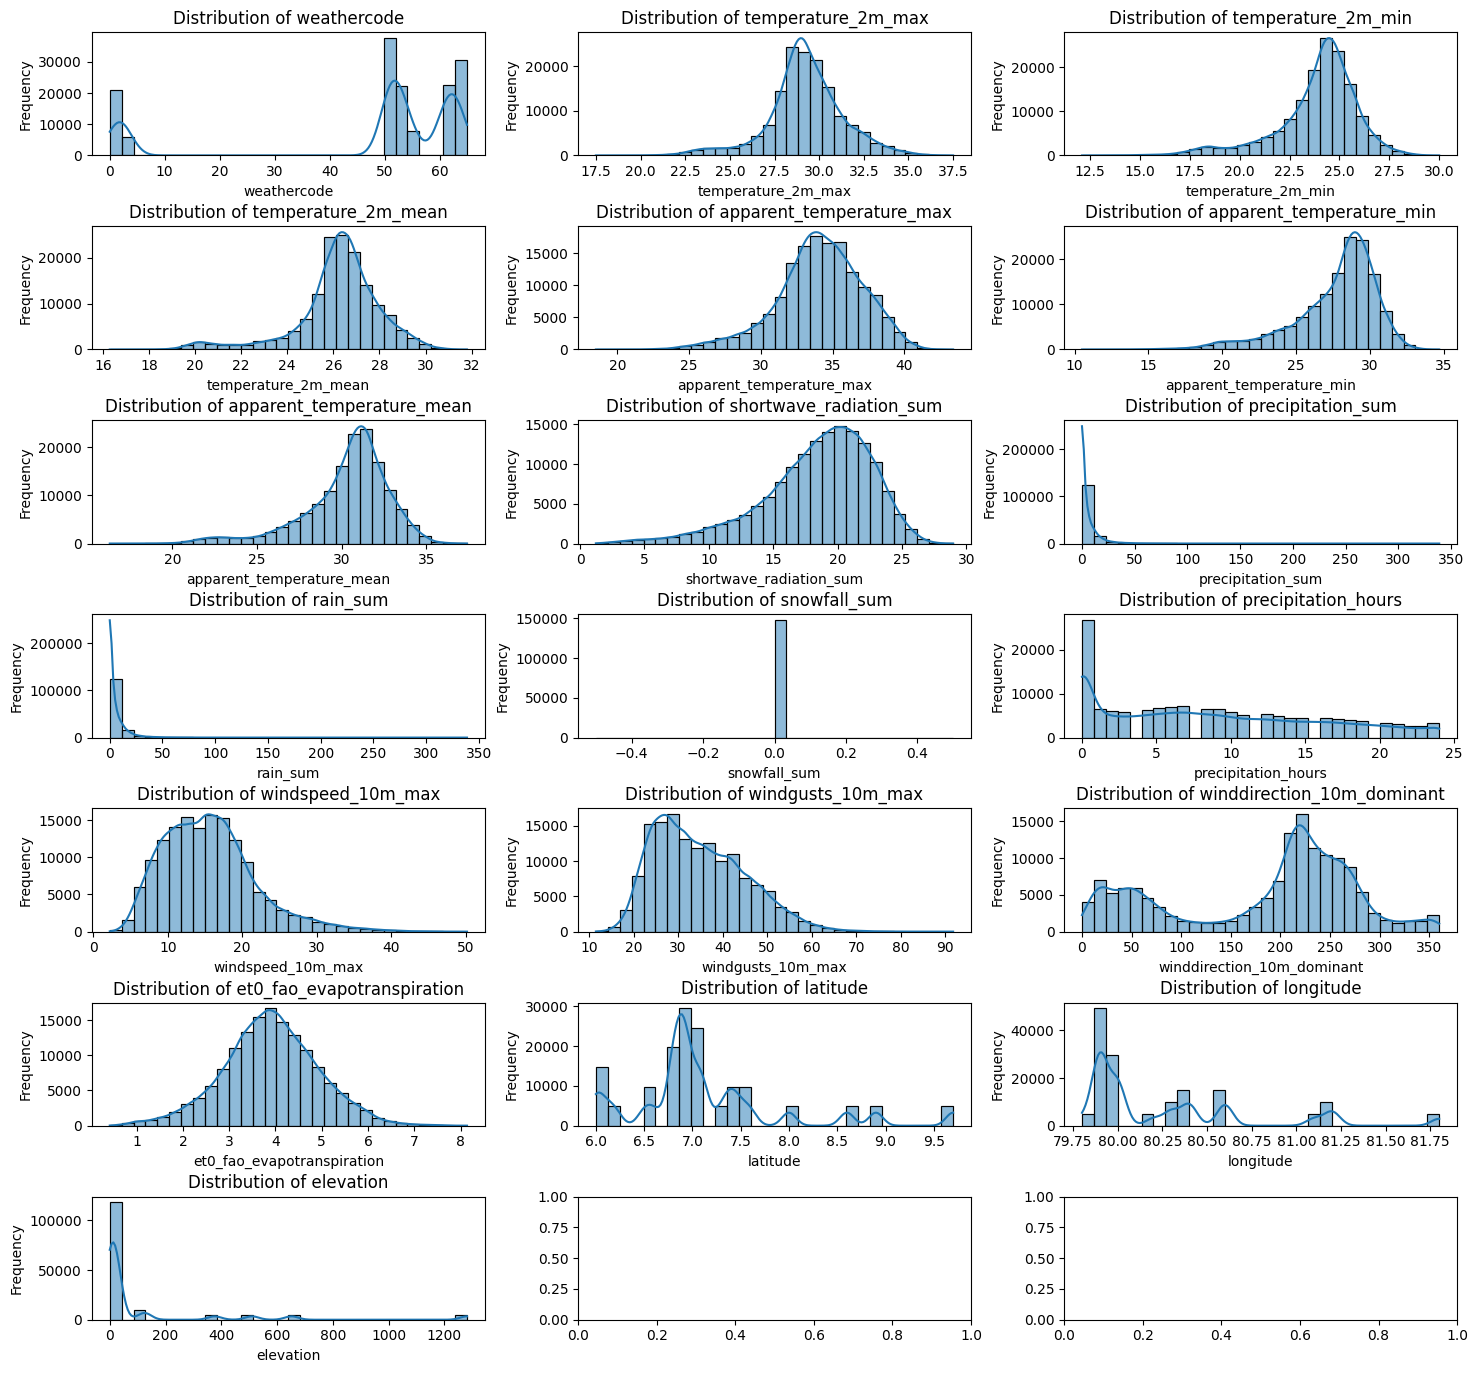

In [5]:
# Visualize the distribution of each numerical feature
numerical_features = weather_df.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed for subplots
num_plots = len(numerical_features)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 2 * num_rows))
fig.tight_layout(pad=3.0)

for i, feature in enumerate(numerical_features):
    row, col = i // num_cols, i % num_cols
    sns.histplot(weather_df[feature], ax=axes[row, col], bins=30, kde=True)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.show()

## Dataset Preprocessing

In [6]:
# Extract year, month, and day
weather_df['year'] = weather_df.index.year
weather_df['month'] = weather_df.index.month
weather_df['day'] = weather_df.index.day

# Convert 'sunrise' and 'sunset' columns to datetime format and extract only time
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise']).dt.time
weather_df['sunset'] = pd.to_datetime(weather_df['sunset']).dt.time
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(weather_df['sunrise'], format='%H:%M:%S').dt.minute
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(weather_df['sunset'], format='%H:%M:%S').dt.minute

# Rename 'precipitation_hours' to 'rain_hours'
weather_df.rename(columns={'precipitation_hours': 'rain_hours'}, inplace=True)

# Remove unnecessary columns
columns_to_remove = ['precipitation_sum', 'snowfall_sum', 'latitude', 'longitude', 'elevation', 'country']
weather_df.drop(columns=columns_to_remove, inplace=True)

# Reorder columns
column_order = ['city', 'year', 'month', 'day', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
                'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min',
                'apparent_temperature_mean', 'sunrise', 'sunset', 'shortwave_radiation_sum',
                'rain_sum', 'rain_hours', 'windspeed_10m_max', 'windgusts_10m_max',
                'winddirection_10m_dominant', 'et0_fao_evapotranspiration']

# Rearrange columns
weather_df = weather_df[column_order]

# Display the first few rows of the modified dataset
weather_df.head()

,city,year,month,day,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,rain_sum,rain_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
time,,,,,,,,,,,,,,,,,,,,
2010-01-01,Colombo,2010,1,1,2,30.0,22.7,26.1,34.4,25.2,29.2,52,755,20.92,0.0,0,11.7,27.4,20,4.58
2010-01-02,Colombo,2010,1,2,51,29.9,23.5,26.2,33.8,26.2,29.8,52,756,17.71,0.1,1,13.0,27.0,24,3.84
2010-01-03,Colombo,2010,1,3,51,29.5,23.2,26.0,34.3,26.3,29.9,53,756,17.76,0.6,3,12.3,27.4,16,3.65
2010-01-04,Colombo,2010,1,4,2,28.9,21.9,25.3,31.6,23.4,27.8,53,757,16.50,0.0,0,17.0,34.6,356,3.79
2010-01-05,Colombo,2010,1,5,1,28.1,21.3,24.5,30.1,23.1,26.1,53,757,23.61,0.0,0,18.7,37.1,355,4.97


In [7]:
# Display basic information about the dataset
print("Dataset Information:")
print(weather_df.info())

# Check for missing values
print("\nMissing Values:")
print(weather_df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147480 entries, 2010-01-01 to 2023-06-17
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   city                        147480 non-null  object 
 1   year                        147480 non-null  int32  
 2   month                       147480 non-null  int32  
 3   day                         147480 non-null  int32  
 4   weathercode                 147480 non-null  int64  
 5   temperature_2m_max          147480 non-null  float64
 6   temperature_2m_min          147480 non-null  float64
 7   temperature_2m_mean         147480 non-null  float64
 8   apparent_temperature_max    147480 non-null  float64
 9   apparent_temperature_min    147480 non-null  float64
 10  apparent_temperature_mean   147480 non-null  float64
 11  sunrise                     147480 non-null  int32  
 12  sunset                      147480 

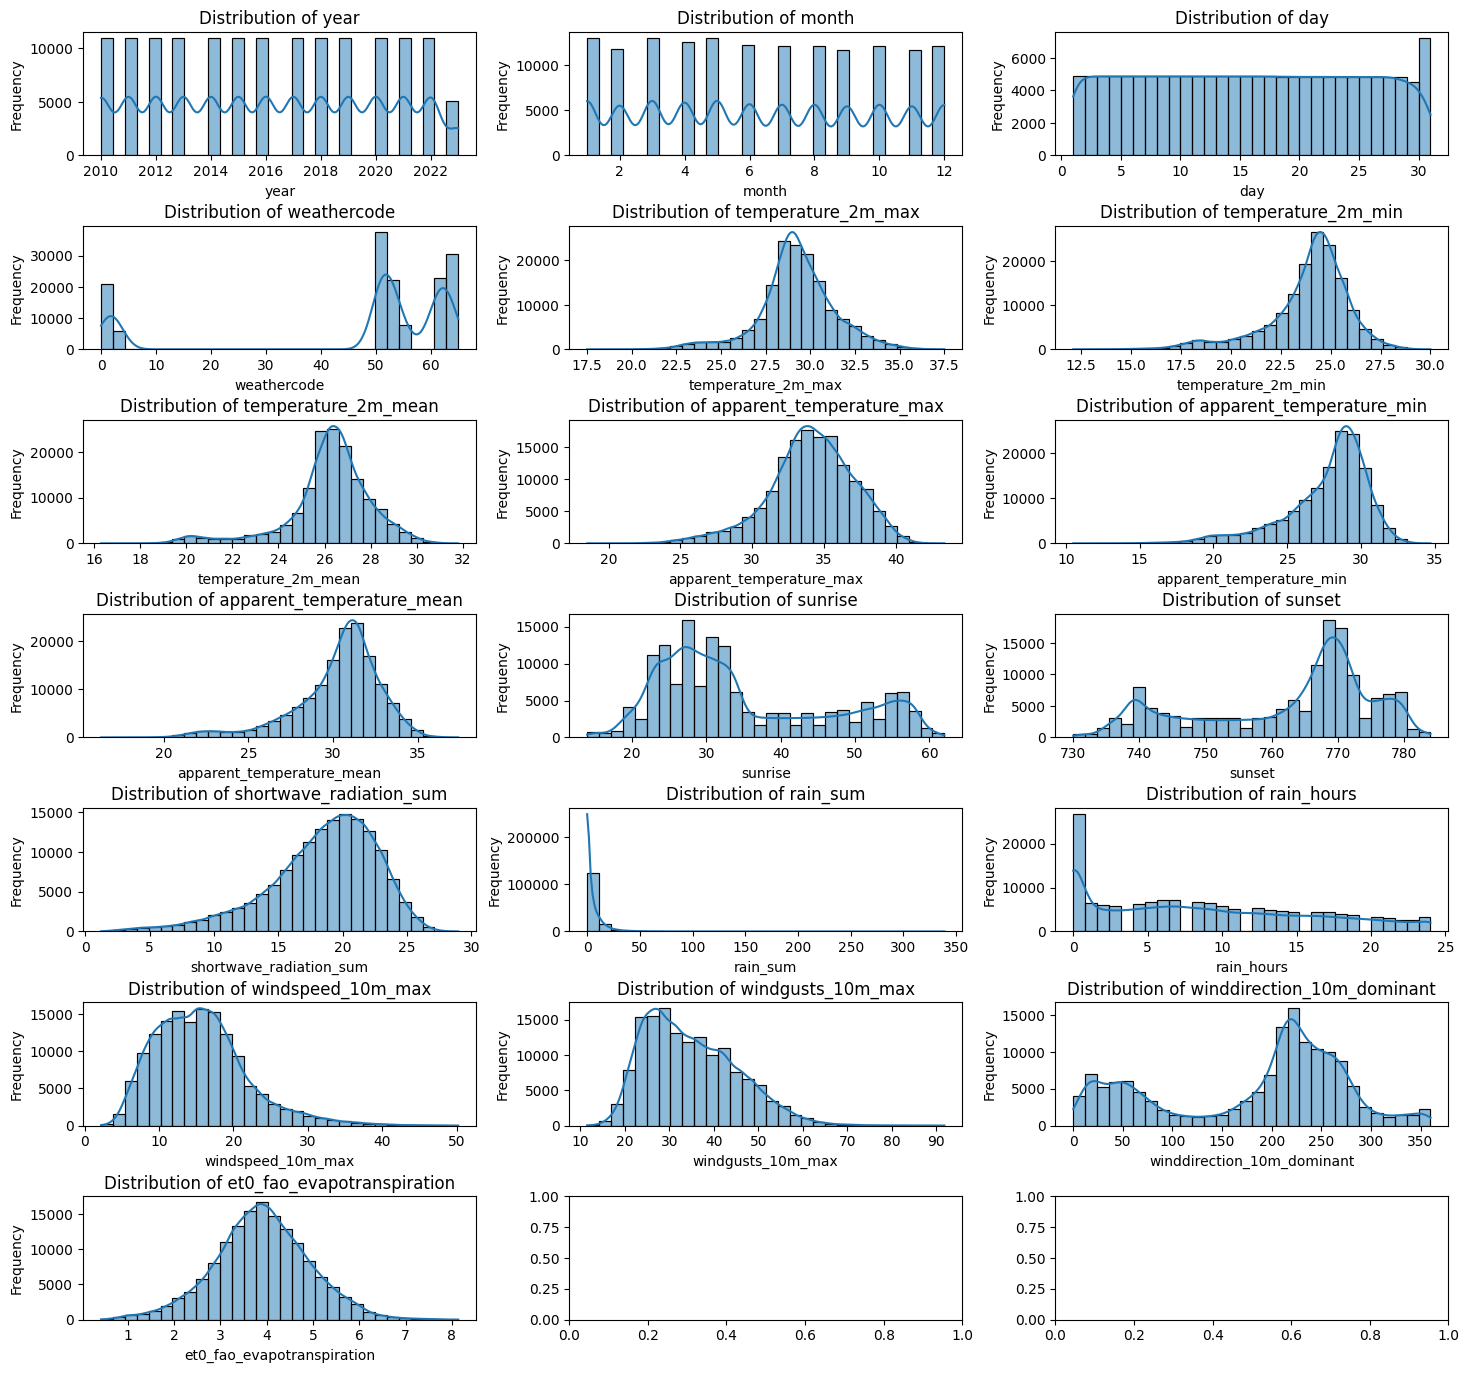

In [8]:
# Visualize the distribution of each numerical feature
numerical_features = weather_df.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed for subplots
num_plots = len(numerical_features)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 2 * num_rows))
fig.tight_layout(pad=3.0)

for i, feature in enumerate(numerical_features):
    row, col = i // num_cols, i % num_cols
    sns.histplot(weather_df[feature], ax=axes[row, col], bins=30, kde=True)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.show()

### Define independent variables (features) and dependent variable (target)

In [9]:
# Define independent variables (features)
X = weather_df[['city', 'year', 'month', 'day']]

# Define dependent variable (target)
y = weather_df[['weathercode', 'temperature_2m_max', 'temperature_2m_min',
                    'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min',
                    'apparent_temperature_mean', 'sunrise', 'sunset', 'shortwave_radiation_sum',
                    'rain_sum', 'rain_hours', 'windspeed_10m_max', 'windgusts_10m_max',
                    'winddirection_10m_dominant', 'et0_fao_evapotranspiration']]

# Display the first few rows of independent variables
X.head()

,city,year,month,day
time,,,,
2010-01-01,Colombo,2010,1,1
2010-01-02,Colombo,2010,1,2
2010-01-03,Colombo,2010,1,3
2010-01-04,Colombo,2010,1,4
2010-01-05,Colombo,2010,1,5


In [10]:
# Display the first few rows of dependent variables
y.head()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,rain_sum,rain_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
time,,,,,,,,,,,,,,,,
2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,52,755,20.92,0.0,0,11.7,27.4,20,4.58
2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,52,756,17.71,0.1,1,13.0,27.0,24,3.84
2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,53,756,17.76,0.6,3,12.3,27.4,16,3.65
2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,53,757,16.50,0.0,0,17.0,34.6,356,3.79
2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,53,757,23.61,0.0,0,18.7,37.1,355,4.97


### Data Encoding

In [11]:
# Separate X into categorical and numerical features
categorical_features_X = ['city']
numerical_features_X = ['year', 'month', 'day']

# Separate y into categorical and numerical features
categorical_features_y = ['weathercode']
numerical_features_y = ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
                            'apparent_temperature_mean', 'sunrise', 'sunset', 'shortwave_radiation_sum',
                            'apparent_temperature_max', 'apparent_temperature_min',
                            'rain_sum', 'rain_hours', 'windspeed_10m_max', 'windgusts_10m_max',
                            'winddirection_10m_dominant', 'et0_fao_evapotranspiration']

# Apply OneHotEncoding to categorical features in X with 0 or 1 encoding
X_encoded = pd.get_dummies(X, columns=categorical_features_X, drop_first=True, dtype=int)

# Encode 'year', 'month', and 'day'
X_encoded['year'] = X_encoded['year'].astype(str)
X_encoded['month'] = X_encoded['month'].astype(str)
X_encoded['day'] = X_encoded['day'].astype(str)

X_encoded = pd.get_dummies(X_encoded, columns=['year', 'month', 'day'], drop_first=True, dtype=int)

# Display the first few rows of the encoded X
X_encoded.head()

,city_Badulla,city_Bentota,city_Colombo,city_Galle,city_Gampaha,city_Hambantota,city_Hatton,city_Jaffna,city_Kalmunai,city_Kalutara,...,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-03,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2010-01-04,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2010-01-05,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147480 entries, 2010-01-01 to 2023-06-17
Data columns (total 83 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   city_Badulla                    147480 non-null  int32
 1   city_Bentota                    147480 non-null  int32
 2   city_Colombo                    147480 non-null  int32
 3   city_Galle                      147480 non-null  int32
 4   city_Gampaha                    147480 non-null  int32
 5   city_Hambantota                 147480 non-null  int32
 6   city_Hatton                     147480 non-null  int32
 7   city_Jaffna                     147480 non-null  int32
 8   city_Kalmunai                   147480 non-null  int32
 9   city_Kalutara                   147480 non-null  int32
 10  city_Kandy                      147480 non-null  int32
 11  city_Kesbewa                    147480 non-null  int32
 12  city_Kolonnawa              

In [13]:
# Apply OneHotEncoding to categorical features in y
y_encoded = pd.get_dummies(y, columns=categorical_features_y, drop_first=True)

# Display the first few rows of the encoded y
y_encoded.head()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,rain_sum,...,et0_fao_evapotranspiration,weathercode_1,weathercode_2,weathercode_3,weathercode_51,weathercode_53,weathercode_55,weathercode_61,weathercode_63,weathercode_65
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,30.0,22.7,26.1,34.4,25.2,29.2,52,755,20.92,0.0,...,4.58,False,True,False,False,False,False,False,False,False
2010-01-02,29.9,23.5,26.2,33.8,26.2,29.8,52,756,17.71,0.1,...,3.84,False,False,False,True,False,False,False,False,False
2010-01-03,29.5,23.2,26.0,34.3,26.3,29.9,53,756,17.76,0.6,...,3.65,False,False,False,True,False,False,False,False,False
2010-01-04,28.9,21.9,25.3,31.6,23.4,27.8,53,757,16.50,0.0,...,3.79,False,True,False,False,False,False,False,False,False
2010-01-05,28.1,21.3,24.5,30.1,23.1,26.1,53,757,23.61,0.0,...,4.97,True,False,False,False,False,False,False,False,False


In [14]:
# Apply StandardScaler to numerical features in y
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numerical features in y
scaler = StandardScaler()
y_scaled_array = scaler.fit_transform(y_encoded)

# Convert the scaled array back to a DataFrame with column names
y_scaled = pd.DataFrame(y_scaled_array, columns=y_encoded.columns)

# Display the first few rows of the scaled y
y_scaled.head()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,rain_sum,...,et0_fao_evapotranspiration,weathercode_1,weathercode_2,weathercode_3,weathercode_51,weathercode_53,weathercode_55,weathercode_61,weathercode_63,weathercode_65
0,0.357317,-0.582684,-0.068176,0.096976,-0.885735,-0.439744,1.469294,-0.558121,0.578154,-0.584972,...,0.668402,-0.261478,3.632788,-0.203724,-0.584543,-0.42216,-0.236213,-0.42641,-0.478507,-0.142248
1,0.310155,-0.194200,-0.013891,-0.105307,-0.533007,-0.203548,1.469294,-0.481851,-0.183547,-0.575182,...,-0.054874,-0.261478,-0.275271,-0.203724,1.710737,-0.42216,-0.236213,-0.42641,-0.478507,-0.142248
2,0.121506,-0.339881,-0.122461,0.063263,-0.497734,-0.164182,1.555092,-0.481851,-0.171682,-0.526236,...,-0.240580,-0.261478,-0.275271,-0.203724,1.710737,-0.42216,-0.236213,-0.42641,-0.478507,-0.142248
3,-0.161468,-0.971169,-0.502453,-0.847013,-1.520646,-0.990867,1.555092,-0.405581,-0.470668,-0.584972,...,-0.103744,-0.261478,3.632788,-0.203724,-0.584543,-0.42216,-0.236213,-0.42641,-0.478507,-0.142248
4,-0.538766,-1.262532,-0.936731,-1.352722,-1.626465,-1.660088,1.555092,-0.405581,1.216463,-0.584972,...,1.049588,3.824420,-0.275271,-0.203724,-0.584543,-0.42216,-0.236213,-0.42641,-0.478507,-0.142248


In [15]:
import pickle

# Save X_encoded to a pickle file
with open('X_encoded.pkl', 'wb') as file:
    pickle.dump(X_encoded, file)

# Save y_encoded to a pickle file
with open('y_encoded.pkl', 'wb') as file:
    pickle.dump(y_encoded, file)